**–ó–∞–¥–∞–Ω–∏–µ**: –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–±—É—á–∏—Ç—å –º–µ—Ç–æ–¥–æ–º Transfer Learning –æ–¥–Ω—É –∏–∑ –≥–æ—Ç–æ–≤—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä ResNet, VGG, etc. –∏—Å–ø–æ–ª—å–∑—É—è –¥–∞—Ç–∞—Å–µ—Ç –∫–æ—à–∫–∏ –ø—Ä–æ—Ç–∏–≤ —Å–æ–±–∞–∫.

–ó–∞–≥—Ä—É–∑–∫–∞ –≤—Å–µ—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import requests, zipfile, io
import os
import cv2
from random import shuffle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

## **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

–ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Å—Å—ã–ª–∫–∏, –∫–æ—Ç–æ—Ä–∞—è –±—ã–ª–∞ –¥–∞–Ω–∞ –≤ —á–∞—Ç–µ (—Å –≥–∏—Ç–∞).

In [ ]:
r = requests.get('https://github.com/laxmimerit/dog-cat-full-dataset/archive/refs/heads/master.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

–†–∞–∑–¥–µ–ª—è—é –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é –ø—É—Ç–µ–π. –§–∞–π–ª—ã –∑–∞–≥—Ä—É–∂–µ–Ω—ã –≤ —Å–µ—Å—Å–∏–æ–Ω–Ω–æ–µ —Ö—Ä–∞–Ω–∏–ª–∏—â–µ –∫–æ–ª–∞–±–∞.

In [ ]:
train_dir = os.path.join('/content/dog-cat-full-dataset-master/data', 'train')
test_dir = os.path.join('/content/dog-cat-full-dataset-master/data', 'test')

–ó–∞–ø–æ–º–∏–Ω–∞—é –ø—É—Ç–∏ –∫ –¥–∞–Ω–Ω—ã–º —Å –ø–æ–º–æ—â—å—é –∫–æ–º–∞–Ω–¥—ã `join`, —á—Ç–æ–±—ã –ø–æ—Ç–æ–º –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –º–∞—Å—Å–∏–≤ –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å.

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

–ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö. –í—Å–µ–≥–æ –±—ã–ª–æ 20000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ 5000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è —Ç–µ—Å—Ç–∞.

In [ ]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å –∫–æ—à–∫–∞–º–∏:  ', len(os.listdir(train_cats_dir)))
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å —Å–æ–±–∞–∫–∞–º–∏: ', len(os.listdir(train_dogs_dir)))
print('–í—Å–µ–≥–æ: ', (len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))))

print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å –∫–æ—à–∫–∞–º–∏:  ', len(os.listdir(test_cats_dir)))
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å —Å–æ–±–∞–∫–∞–º–∏: ', len(os.listdir(test_dogs_dir)))
print('–í—Å–µ–≥–æ: ', (len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir))))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å –∫–æ—à–∫–∞–º–∏:   10000
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å —Å–æ–±–∞–∫–∞–º–∏:  10000
–í—Å–µ–≥–æ:  20000
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å –∫–æ—à–∫–∞–º–∏:   2500
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å —Å–æ–±–∞–∫–∞–º–∏:  2500
–í—Å–µ–≥–æ:  5000


–î–∞–ª–µ–µ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—é –¥–≤–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –º–µ—Ç–æ–¥–∞: –¥–ª—è –º–∞—Å—Å–∏–≤–∞ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ `one-hot-encoder` –∏ –¥–ª—è —Å–∞–º–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (—á—Ç–æ–±–∞ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∏—Ö –≤ —Ü–∏—Ñ—Ä–æ–≤–æ–π —Ñ–æ—Ä–º–∞—Ç). –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ–¥–ø–∏—Å–∞–Ω—ã –≤ –≤–∏–¥–µ `'cat.number.format'`

In [ ]:
def label_pet_image_one_hot_encoder(img):
    #–ë–µ—Ä—É —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ —Å–∏–º–≤–æ–ª–∞ –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏—è
    pet = img.split('.')[-3]
    #–≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å–æ–∑–¥–∞–µ—Ç—Å—è –º–∞—Å—Å–∏–≤
    if pet == 'cat': return [1,0]
    elif pet == 'dog': return [0,1]

–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –∫–∞—Ç–∞–ª–æ–≥–∞:

```
|dog-cat-full-dataset-master
 |data
    |test
       |cats
       |dogs
    |train
       |cats
       |dogs
```

  


In [ ]:
def process_data(data_image_list, isTrain=True):
    data_df = []#–æ–±—ä—è–≤–ª–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    #–ø—Ä–æ—Ö–æ–∂—É –ø–æ –≤—Å–µ–º –ø–∞–ø–∫–∞–º –¥–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–π –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –∏ —Ñ–∞–π–ª–æ–≤ –≤ –Ω–µ–π
    for dir in os.listdir(data_image_list):
      for img in os.listdir(data_image_list +'/'+ dir):
        path = os.path.join(data_image_list +'/'+ dir, img)
        #–≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–æ–≥–æ, —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏–ª–∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–Ω—è—é
        #–º–∞—Å—Å–∏–≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π y
        if(isTrain):
            label = label_pet_image_one_hot_encoder(img)
        else:
            label = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224,224))
        data_df.append([np.array(img),np.array(label)])
    #–≥–æ—Ç–æ–≤—ã–π –º–∞—Å—Å–∏–≤ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—é, —á—Ç–æ–±—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—ã–ª–∏ –≤ —Ä–∞–∑–±—Ä–æ—Å, –∞ –Ω–µ –ø–æ –ø–æ—Ä—è–¥–∫—É
    shuffle(data_df)
    return data_df

In [ ]:
data_train = process_data(train_dir) #—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –º–∞—Å—Å–∏–≤

–î–∞–ª–µ–µ –¥–ª—è –Ω–∞–≥–ª–∞–¥–Ω–æ—Å—Ç–∏ —Å—Ç–æ–∏—Ç –≤—ã–≤–µ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –ø–æ—ç—Ç–æ–º—É —Å–æ–∑–¥–∞—é –¥–ª—è —ç—Ç–æ–≥–æ –º–µ—Ç–æ–¥ `show_image`

In [ ]:
def show_image(data_train):
  fig, axes = plt.subplots(nrows=1, ncols=len(data_train), figsize=(20, 20))
  for i, img in enumerate(data_train):
    #—Ç.–∫. —ç—Ç–æ –º–∞—Å—Å–∏–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π–π –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏ —Å–∞–º –º–∞—Å—Å–∏–≤ —Ü–∏—Ñ—Ä, —Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –µ–≥–æ —Ä–∞–∑–±–∏—Ç—å
    #–ø–µ—Ä–µ–º–µ–º–Ω–Ω–∞—è –¥–ª—è Y
    img_label = img[1]
    #–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –º–∞—Å—Å–∏–≤–∞ X
    img_data = img[0]
    label = np.argmax(img_label)
    axes[i].imshow(img_data)
    axes[i].axis('off')
    axes[i].set_title('cat' if label==0 else 'dog')
  plt.show()

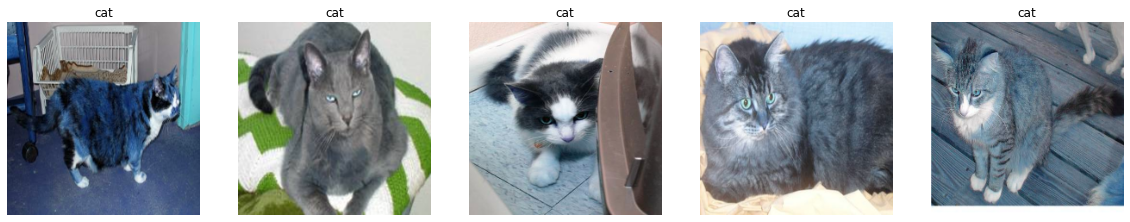

In [ ]:
show_image(data_train[:5]) #–≤—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö 5—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –±–∞—Ç—á–∞

In [ ]:
data_test = process_data(test_dir)#—Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [ ]:
X_train = np.array([i[0] for i in data_train]).reshape(-1,224,224,3)
y_train = np.array([i[1] for i in data_train])

## **–°–±–æ—Ä–∫–∞ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏**

In [ ]:
model = Sequential()#–æ–±—ä—è–≤–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ò—Å–ø–æ–ª—å–∑—É—é –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å `ResNet50` –∏ –µ—ë –≤–µ—Å–∞ `imagenet`. –ü–æ—Å–ª–µ —á–µ–≥–æ –¥–æ–±–∞–≤–ª—è—é –µ—â—ë –æ–¥–∏–Ω —Å–ª–æ–π —Å –¥–≤—É–º—è –≤—ã—Ö–æ–¥–∞–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ `softmax`

In [ ]:
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
model.add(Dense(2, activation='softmax'))
#–ø–µ—Ä–≤—ã–π —Å–ª–æ–π ResNet-–∞ —É–∂–µ –æ–±—É—á–µ–Ω, –ø–æ—ç—Ç–æ–º—É –µ–≥–æ –æ–±—É—á–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ
model.layers[0].trainable = True

–°–±–æ—Ä–∫–∞ –º–æ–¥–µ–ª–∏. –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä `agd`, —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å - `crossentropy` –∏ –º–µ—Ç—Ä–∏–∫–∞ `accuracy` –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

–†–∞–∑–±–∏–≤–∞—é –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ –∏ —Ç–µ—Å—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è, –ø–æ–ø–æ–ª–∞–º (50%). –≠—Ç–æ–≥–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ –±–æ–ª–µ–µ `0.97`

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=2018)

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏. –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 64 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –≤—Å–µ–≥–æ –±—É–¥–µ—Ç 20 —ç–ø–æ—Ö –∏ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—è –¥–ª—è –ª—É—á—à–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/20
157/157 [==============================] - 179s 1s/step - loss: 3.0926 - accuracy: 0.8962 - val_loss: 0.1363 - val_accuracy: 0.9551
Epoch 2/20
157/157 [==============================] - 122s 780ms/step - loss: 0.0577 - accuracy: 0.9809 - val_loss: 0.1057 - val_accuracy: 0.9658
Epoch 3/20
157/157 [==============================] - 122s 778ms/step - loss: 0.0191 - accuracy: 0.9956 - val_loss: 0.0835 - val_accuracy: 0.9674
Epoch 4/20
157/157 [==============================] - 122s 779ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.0872 - val_accuracy: 0.9696
Epoch 5/20
157/157 [==============================] - 135s 863ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0856 - val_accuracy: 0.9734
Epoch 6/20
157/157 [==============================] - 122s 780ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 7/20
157/157 [==============================] - 122s 778ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0821 - va

–û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ –±–æ–ª—å—à–µ 40 –º–∏–Ω—É—Ç. –ü—Ä–∏ —ç—Ç–æ–º –ø—Ä–æ–∏–∑–æ—à–ª–æ –ø–æ—á—Ç–∏ –ø–æ–ª–Ω–æ–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–π –ø–∞–º—è—Ç–∏, –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏—à–ª–æ—Å—å –æ—á–∏—Å—Ç–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –¥–∞–ª—å–Ω–µ–π—à—É—é –ø—Ä–æ–≤–µ—Ä–∫—É –º–æ–¥–µ–ª–∏ –∏ –Ω–µ –ø–µ—Ä–µ–∑–∞–ø—É—Å–∫–∞—Ç—å —Å–µ–∞–Ω—Å. –ü–µ—Ä–µ–ø–æ–ª–Ω–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–π –ø–∞–º—è—Ç–∏ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –≤—ã–∑–≤–∞–ª –Ω–µ–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∫–æ–¥

In [ ]:
X_train = []
y_train = []
data_train = 0

–í—ã–≤–µ–¥—É –∏—Ç–æ–≥–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è `loss` –∏ `accuracy`. –ï—Å—Ç—å –≥–∏–ø–æ—Ç–µ–∑–∞, —á—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –º–æ–≥ –±—ã –±—ã—Ç—å –ª—É—á—à–µ, –∏—Å–ø–æ–ª—å–∑—É–π —è –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –Ω–∞–ø—Ä–∏–º–µ—Ä 80%. –û–¥–Ω–∞–∫–æ —Ç–æ–≥–¥–∞ —è —Å—Ç–∞–ª–∫–∏–≤–∞—é—Å—å —Å –ø—Ä–æ–±–ª–µ–º–æ–π –ø–µ—Ä–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –û–ó–£ –∏ –º–æ—ë –æ–±—É—á–µ–Ω–∏–µ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –¥–∞–∂–µ –Ω–∞—á–∞—Ç—å.

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('–§—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏:', score[0])
print('Accuracy:', score[1])

–§—É–Ω–∫—Ü–∏—è –æ—à–∏–±–∫–∏: 0.08917998522520065
Accuracy: 0.9760000109672546


## **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏**

–î–∞–ª–µ–µ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—é –º–µ—Ç–æ–¥ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –í —Ü–µ–ª–æ–º, –º–µ—Ç–æ–¥ –ø–æ—á—Ç–∏ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –º–µ—Ç–æ–¥–∞ `show_image`

In [ ]:
def show_results(data_test):
  fig, axes = plt.subplots(nrows=1, ncols=len(data_test), figsize=(20, 20))
  for i, img in enumerate(data_test):
    img_label = img[1]
    img_data = img[0]
    label = np.argmax(img_label)
    img_data = img_data.reshape(-1,224,224,3)
    #–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    model_out = model.predict(img_data)
    if np.argmax(model_out) == 1 and label == 1:
      label='Its dog'
    elif np.argmax(model_out) == 0 and label == 0:
      label='Its cat'
    else:
      label='–ù–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω'
    axes[i].imshow(img[0])
    axes[i].axis('off')
    axes[i].set_title(label)
  plt.show()

–ü–µ—Ä–≤—ã–π —Ä–∞–∑ –±—ã–ª–æ –≤—ã–≤–µ–¥–µ–Ω–æ 10 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–∏, –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ 7 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –±—ã–ª–æ –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –º–æ–¥–µ–ª—å—é

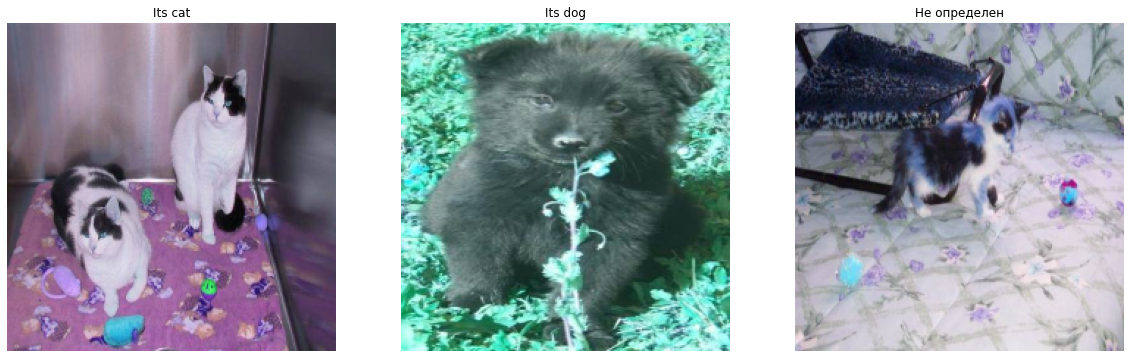

In [ ]:
show_results(data_test[3:6])

–•–æ—Ç–µ–ª–æ—Å—å –±—ã –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è—Ö –∫–æ—Ç–∞, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç—Å—è —É –∞–≤—Ç–æ—Ä–∞ üòÑ

–ú–µ—Ç–æ–¥ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ —Å–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ —Ö—Ä–∞–Ω–∏–ª–∏—â–∞

In [ ]:
def load_files(data_image_list):
    data_df = []
    #–ø—Ä–æ—Ö–æ–¥–∏—Ç –ø–æ –≤—Å–µ–º —Ñ–∞–π–ª–∞–º –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏
    for img in os.listdir(data_image_list):
      #–∑–∞–ø–∏—Å—ã–≤–∞–µ—Ç –ø—É—Ç—å –∫ –∫–∞–∂–¥–æ–π –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏
      path = os.path.join(data_image_list, img)
      img = cv2.imread(path,cv2.IMREAD_COLOR)
      #–∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞
      img = cv2.resize(img, (224,224))
      #–º–∞—Å—Å–∏–≤ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
      data_df.append([np.array(img)])
    return data_df

In [ ]:
arr_cats = load_files('/content/testdata/')

In [ ]:
X_test = np.array(arr_cats)

–ü–µ—Ä–µ–ø–∏—Å–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ `show_results` –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –ø–æ–¥ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [ ]:
def show_results(data_test):
  fig, axes = plt.subplots(nrows=1, ncols=len(data_test), figsize=(15, 20))
  for i, img in enumerate(data_test):
    model_out = model.predict(img)
    if np.argmax(model_out) == 1:
      label='–≠—Ç–æ —Å–æ–±–∞–∫–∞'
    else:
      label='–≠—Ç–æ –∫–æ—Ç'
    axes[i].imshow(img[0])
    axes[i].axis('off')
    axes[i].set_title(label)
  plt.show()

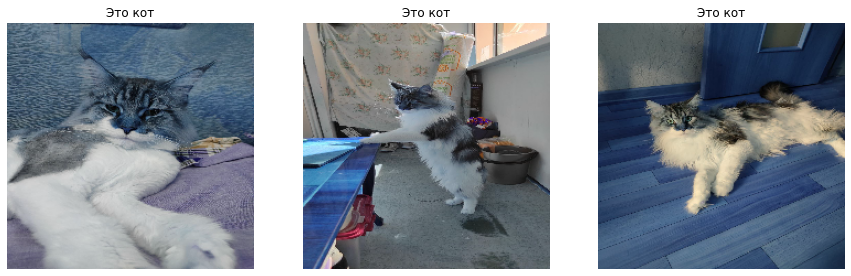

In [ ]:
show_results(X_test)

## **–í—ã–≤–æ–¥**

–ò—Å—Ö–æ–¥—è –∏–∑ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏, –±—ã–ª —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω –ø–æ–¥—Ö–æ–¥ transfer learning, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∑–∞—Ä–∞–Ω–µ–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, —á—Ç–æ–±—ã —Å–Ω–∏–∑–∏—Ç—å –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –Ω–∞–ø–∏—Å–∞–Ω–Ω—ã—Ö –≤—Ä—É—á–Ω—É—é –º–æ–¥–µ–ª–µ–π, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–∏–ª—å–Ω—ã–µ –Ω–∞—Ä–∞–±–æ—Ç–∫–∏ –≥–æ—Ç–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è —É–≤–µ–ª–∏—á–µ—Å–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –¥–æ–ø–∏—Å–∞–Ω–Ω–æ–π —á–∞—Å—Ç–∏. –í —Ü–µ–ª–æ–º, —Ä–µ–∑—É–ª—å—Ç–∞—Ç –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∫–æ—à–µ–∫ –∏ —Å–æ–±–∞–∫ —Å–æ—Å—Ç–∞–≤–∏–ª 0.97 (`accuracy`).